In [1]:
##import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [98]:
##load dataset
df = pd.read_csv("Breast_Cancer.csv")
df.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


In [3]:
df.columns

Index(['Age', 'Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status'],
      dtype='object')

In [4]:
df.shape

(4024, 16)

In [5]:
##data description
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

The breast cancer dataset consists of 4,024 instances and 16 variables including the survival status. Among these, Age, Tumor Size, Regional Nodes Examined, Regional Nodes Positive, and Survival Months are numerical variables, while the remaining variables are categorical.

In [6]:
##checking missing value
df.isnull().sum()

Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
Status                    0
dtype: int64

There is no missing value in the dataset. 

In [7]:
##checking duplicate value
df.duplicated().sum()

1

The dataset contains only one duplicate value. 

In [8]:
##remove duplicate value
df.drop_duplicates(inplace=True)

In [9]:
##numerical variables summary 
df.describe()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
count,4023.000000,4023.000000,4023.000000,4023.000000,4023.000000
mean,53.969923,30.477007,14.358439,4.158837,71.301765
std,8.963118,21.121253,8.100241,5.109724,22.923009
min,30.000000,1.000000,1.000000,1.000000,1.000000
25%,47.000000,16.000000,9.000000,1.000000,56.000000
50%,54.000000,25.000000,14.000000,2.000000,73.000000
75%,61.000000,38.000000,19.000000,5.000000,90.000000
max,69.000000,140.000000,61.000000,46.000000,107.000000


In [10]:
##categorical variables summary
df.describe(include= 'object')

,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Estrogen Status,Progesterone Status,Status
count,4023,4023,4023,4023,4023,4023,4023,4023,4023,4023,4023
unique,3,5,4,3,5,4,4,2,2,2,2
top,White,Married,T2,N1,IIA,Moderately differentiated,2,Regional,Positive,Positive,Alive
freq,3412,2642,1786,2731,1304,2350,2350,3931,3754,3325,3407


### Using visualization to check the missing value

In [11]:
import missingno as msno

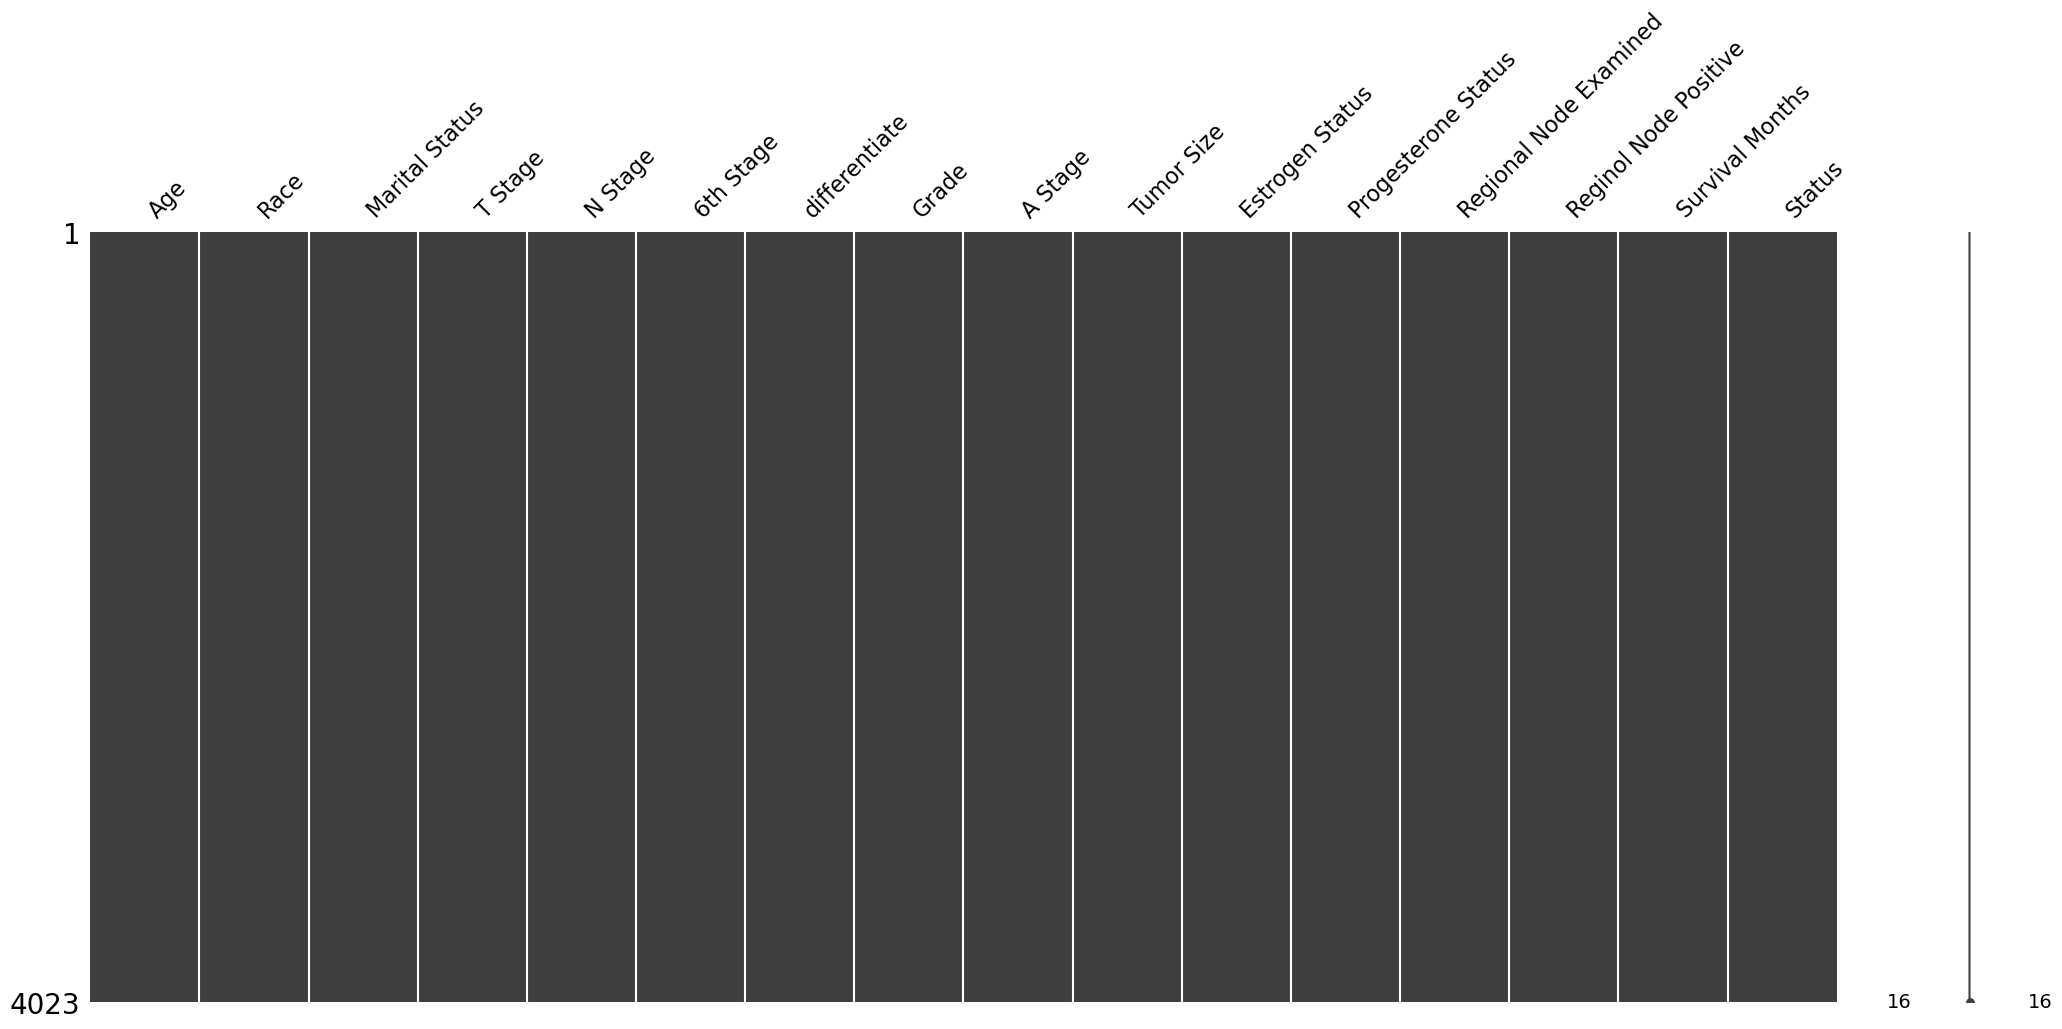

In [12]:
# Display missing matrix
msno.matrix(df)
plt.show()

The plot shows there is no missingness in the dataset. 

### Exploratory analysis 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


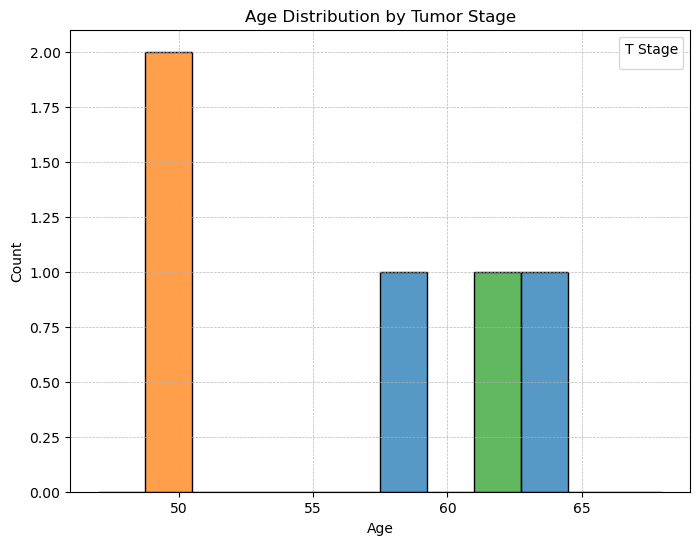

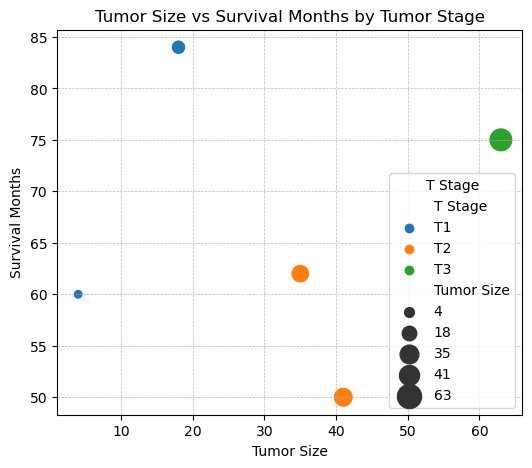

/var/folders/15/58k6nkxs4z1dv6k32vx61d9r0000gn/T/ipykernel_39717/3079669288.py:23: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




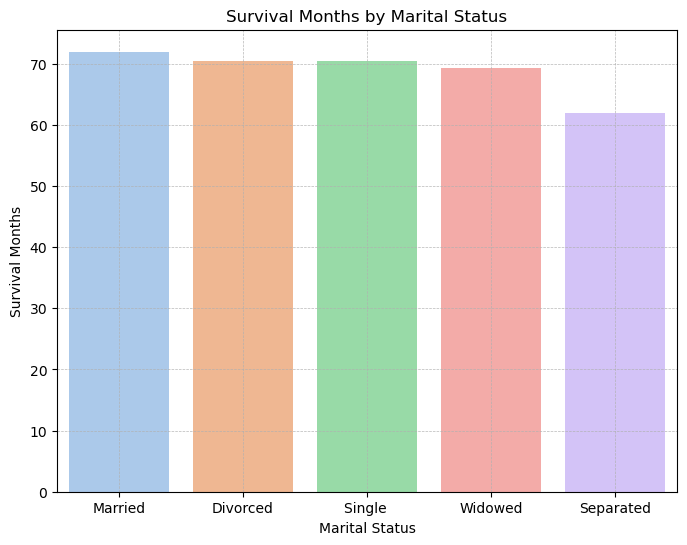

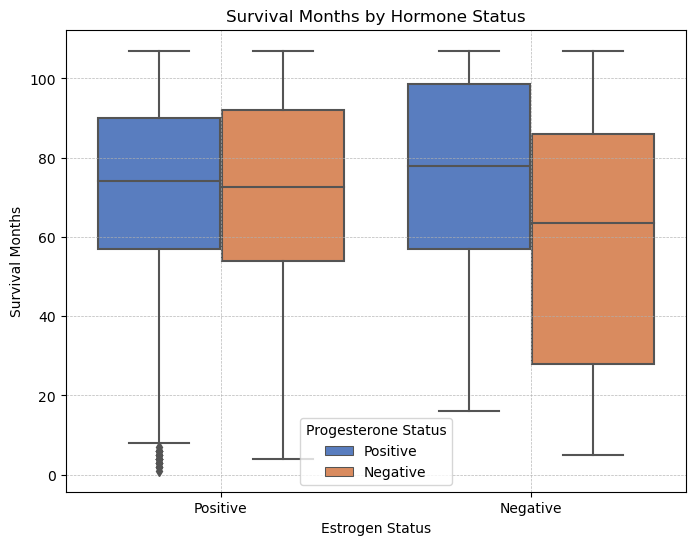

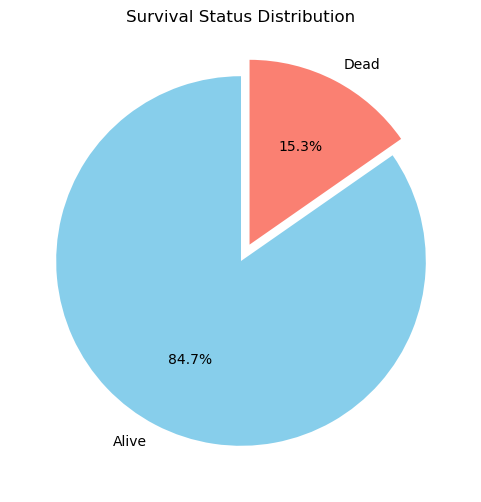

In [113]:
# 1. Age and Cancer Stage Distribution
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='Age', hue='T Stage', multiple='dodge', kde=False)
plt.title('Age Distribution by Tumor Stage')
plt.grid(visible=True, linestyle="--", linewidth=0.5, alpha=0.9)
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='T Stage')
plt.show()

# 2. Tumor Size vs Survival Months by Tumor Stage
plt.figure(figsize=(6, 5))
sns.scatterplot(data=data, x='Tumor Size', y='Survival Months', hue='T Stage', size='Tumor Size', sizes=(50, 300), legend='full')
plt.title('Tumor Size vs Survival Months by Tumor Stage')
plt.grid(visible=True, linestyle="--", linewidth=0.5, alpha=0.9)
plt.xlabel('Tumor Size')
plt.ylabel('Survival Months')
plt.legend(title='T Stage')
plt.show()

# 3. Survival by Marital Status
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='Marital Status', y='Survival Months', ci=None, palette='pastel')
plt.grid(visible=True, linestyle="--", linewidth=0.5, alpha=0.9)
plt.title('Survival Months by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Survival Months')
plt.show()

# 4. Estrogen and Progesterone Status Impact
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Estrogen Status', y='Survival Months', hue='Progesterone Status', palette='muted')
plt.title('Survival Months by Hormone Status')
plt.grid(visible=True, linestyle="--", linewidth=0.5, alpha=0.9)
plt.xlabel('Estrogen Status')
plt.ylabel('Survival Months')
plt.legend(title='Progesterone Status')
plt.show()

# 5. Survival Status Distribution
plt.figure(figsize=(6, 6))
df['Status'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'], explode=(0, 0.1))
plt.title('Survival Status Distribution')
plt.grid(visible=True, linestyle="--", linewidth=0.5, alpha=0.9)
plt.ylabel('')
plt.show()

#### Using Seaborn to check the survival status in the data

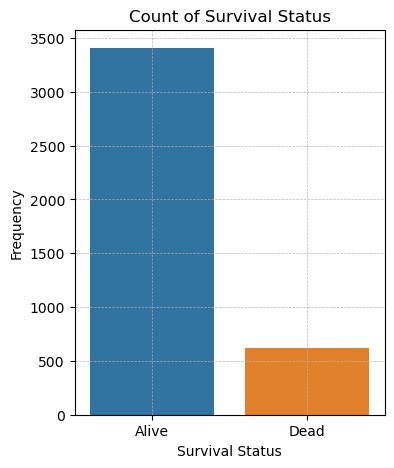

In [13]:
plt.figure(figsize=(4, 5))
sns.countplot(data=df, x="Status")

# Add grid
plt.grid(visible=True, linestyle="--", linewidth=0.5, alpha=0.9)

# Add title and labels
plt.title("Count of Survival Status")
plt.xlabel("Survival Status")
plt.ylabel("Frequency")
plt.show()

The graph illustrates that the number of Alive patients is significantly higher than Dead patients, with over 3400 Alive cases compared to approximately 600 Dead cases in the dataset.

#### Checking Race distribution 

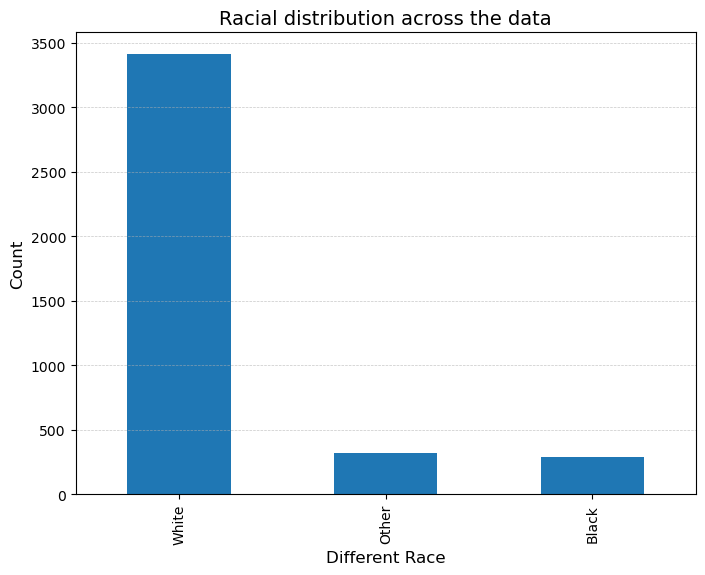

In [14]:
##Using matplotlib

# Plot the bar chart
plt.figure(figsize=(8, 6))
df['Race'].value_counts().plot(kind='bar')

# Add labels and title
plt.title("Racial distribution across the data", fontsize=14)
plt.xlabel("Different Race", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Add grid
plt.grid(visible=True, linestyle="--", linewidth=0.5, alpha=0.7, axis="y")

# Show the plot
plt.show()

#### 2. Checking distibution of numerical variables 

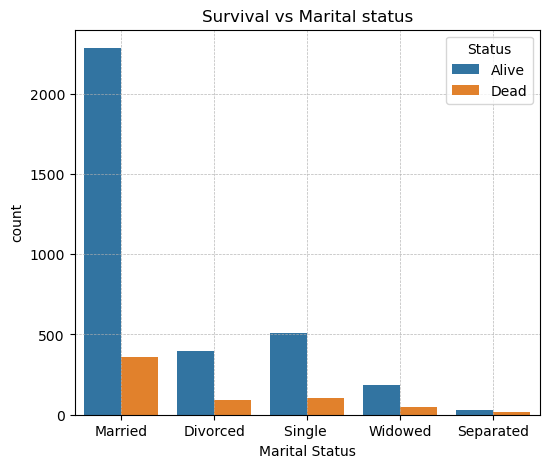

In [18]:
## Cancer survival status based on Marital status

plt.figure(figsize=(6, 5))
sns.countplot(x="Marital Status", hue="Status", data=df)

# Add grid
plt.grid(visible=True, linestyle="--", linewidth=0.5, alpha=0.9)

# Add title and labels
plt.title("Survival Status vs Marital status")
plt.xlabel("Marital Status")
plt.show()

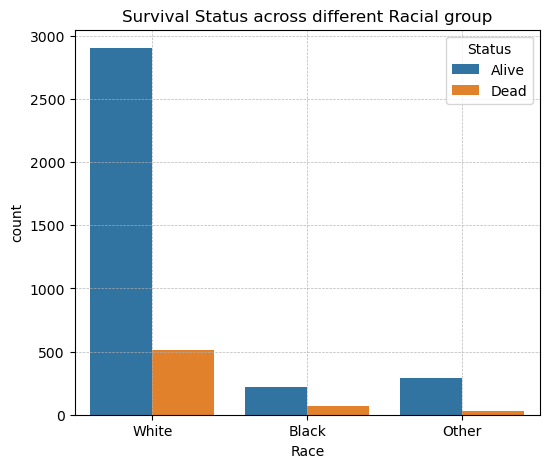

In [83]:
##Cancer survival status across different racial group

plt.figure(figsize=(6, 5))
sns.countplot(x="Race", hue="Status", data=df)

# Add grid
plt.grid(visible=True, linestyle="--", linewidth=0.5, alpha=0.9)

# Add title and labels
plt.title("Survival Status across different Racial group")
plt.xlabel("Race")
plt.show()

In [101]:
df.columns

Index(['Age', 'Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status'],
      dtype='object')

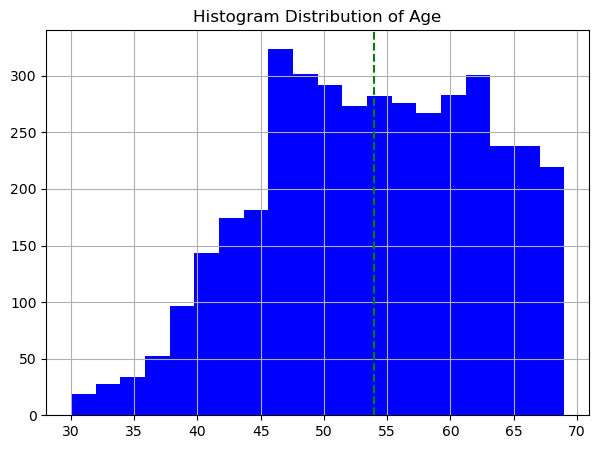

In [22]:
## Histogram of Patient's age
x = df['Age']
x.hist(figsize=(7, 5), color='blue', bins=20)
plt.title('Histogram Distribution of Age')
#plt.legend("Frequency")
plt.axvline(x.mean(), color = 'green', linestyle = 'dashed')
#plt.axvline(x.median(), color = 'red', linestyle = 'dashed')
plt.show()

Text(0.5, 1.0, 'Boxplox of Age Distribution')

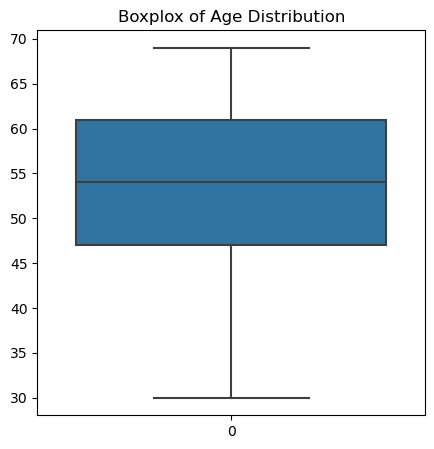

In [17]:
##Using boxplot
plt.figure(figsize=(5, 5))
sns.boxplot(x)
plt.title('Boxplox of Age Distribution')

The histogram and boxplot indicate that most patients were older, with ages ranging between 46 and 62 years. The average age was 54.

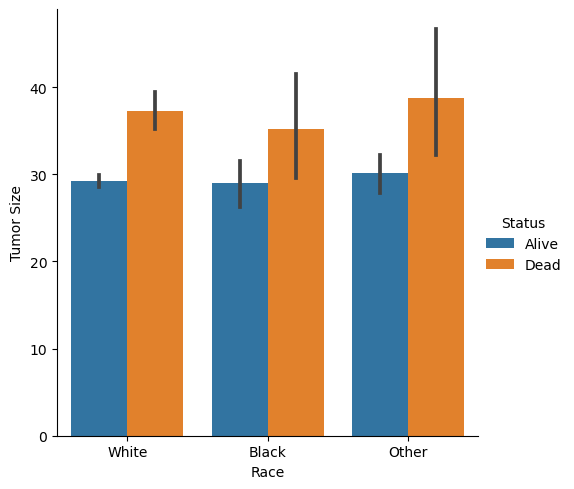

In [84]:
##Using seaborn to see the survial status of different race group based on Tumor size  
sns.catplot(data=df, x='Race', y='Tumor Size', hue='Status', kind='bar')

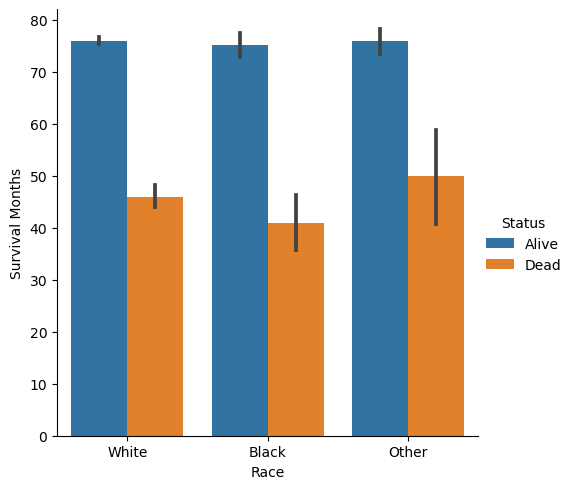

In [59]:
##Using seaborn to see the survial status of different race group based on Survival months
sns.catplot(data=df, x='Race', y='Survival Months', hue='Status', kind='bar')

In [23]:
df['Status'] = df['Status'].replace({'Alive':1,'Dead':0})

### Exploratory Analysis on Numerical data

In [24]:
df_num = df[['Age', 'Tumor Size', 'Regional Node Examined', 'Reginol Node Positive', 'Survival Months', 'Status']]

### Correlation Matrix

In [25]:
x = df_num.corr()
x.style.background_gradient(cmap='coolwarm')

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months,Status
Age,1.000000,-0.077069,-0.033186,0.012743,-0.009224,-0.056036
Tumor Size,-0.077069,1.000000,0.104258,0.242247,-0.087016,-0.134147
Regional Node Examined,-0.033186,0.104258,1.000000,0.411520,-0.022166,-0.034705
Reginol Node Positive,0.012743,0.242247,0.411520,1.000000,-0.135330,-0.256591
Survival Months,-0.009224,-0.087016,-0.022166,-0.135330,1.000000,0.476622
Status,-0.056036,-0.134147,-0.034705,-0.256591,0.476622,1.000000


### Heatmap

<Axes: >

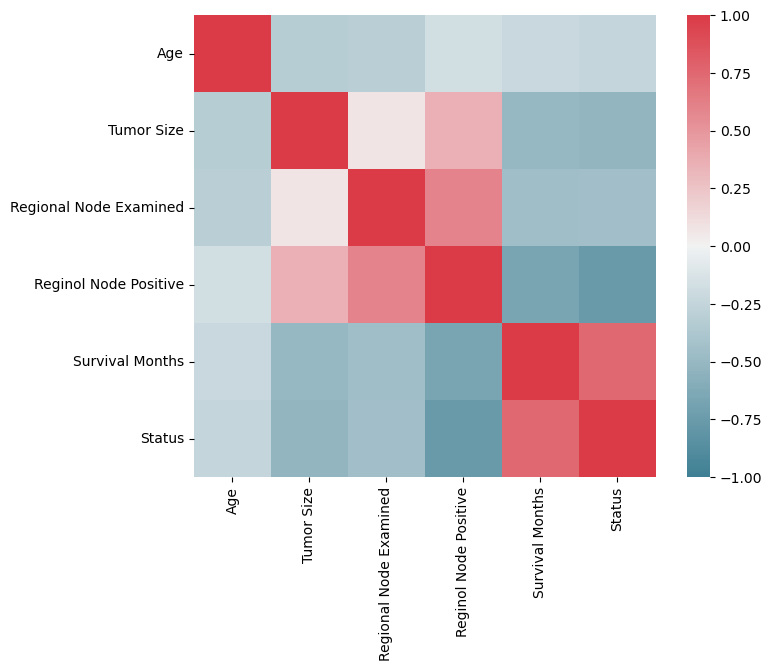

In [29]:
f, ax = plt.subplots(figsize=(8, 6))
corr = x.corr()
sns.heatmap(corr,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)

### Pairplot

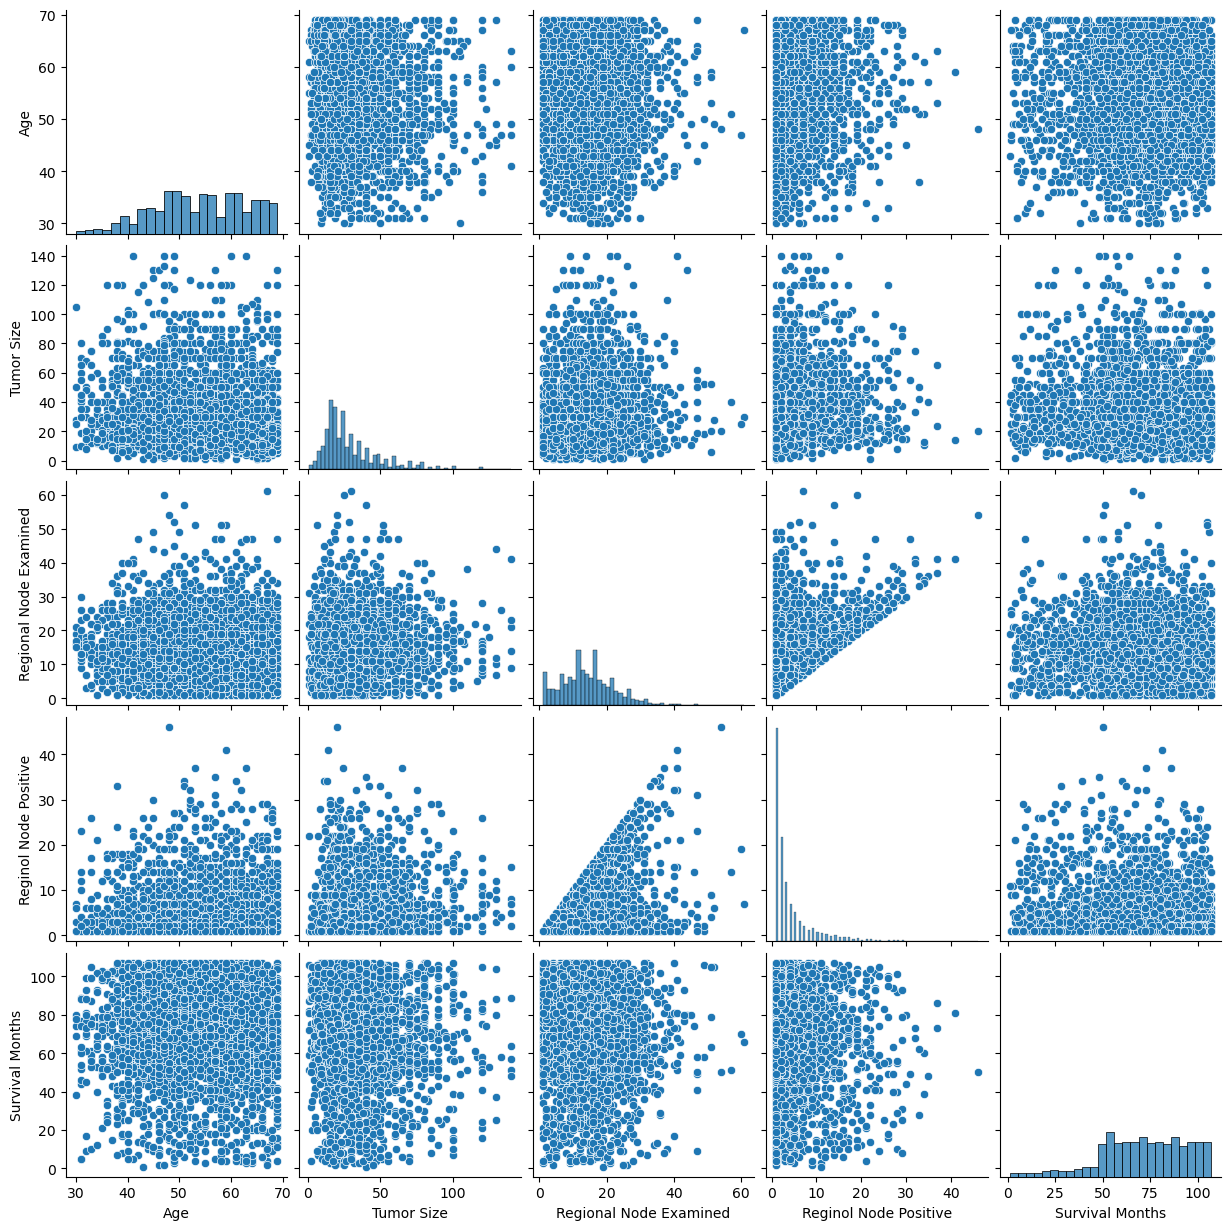

In [90]:
sns.pairplot(df)

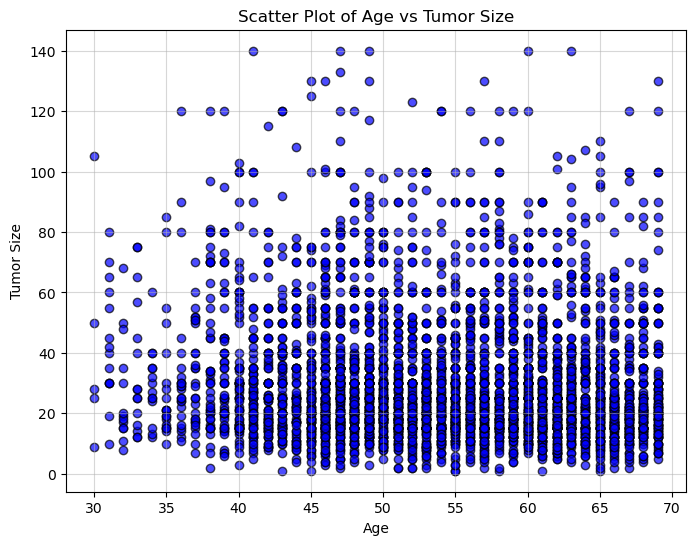

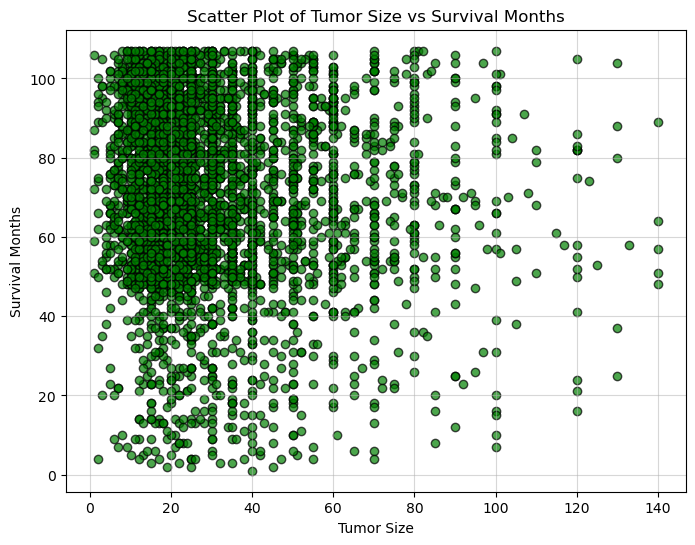

In [82]:
# Scatter plot: Age vs Tumor Size
plt.figure(figsize=(8, 6))
plt.scatter(df['Age'], df['Tumor Size'], c='blue', alpha=0.7, edgecolors='k')
plt.title('Scatter Plot of Age vs Tumor Size')
plt.xlabel('Age')
plt.ylabel('Tumor Size')
plt.grid(alpha=0.5)
plt.show()

# Scatter plot: Tumor Size vs Survival Months
plt.figure(figsize=(8, 6))
plt.scatter(df['Tumor Size'], df['Survival Months'], c='green', alpha=0.7, edgecolors='k')
plt.title('Scatter Plot of Tumor Size vs Survival Months')
plt.xlabel('Tumor Size')
plt.ylabel('Survival Months')
plt.grid(alpha=0.5)
plt.show()

<Figure size 1000x600 with 0 Axes>

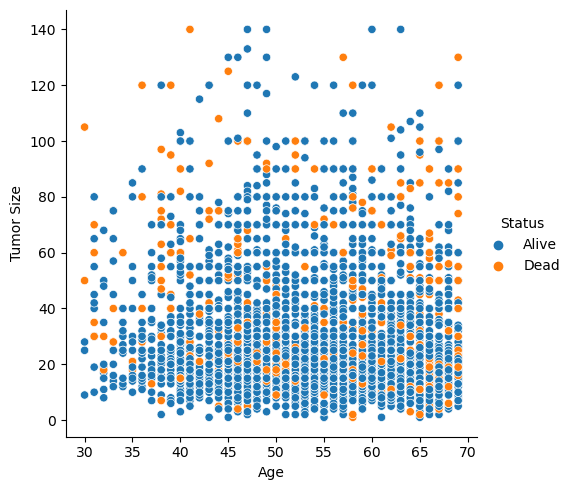

In [78]:
plt.figure(figsize=(10, 6))
sns.relplot(x='Age', y='Tumor Size', hue='Status', data=df)

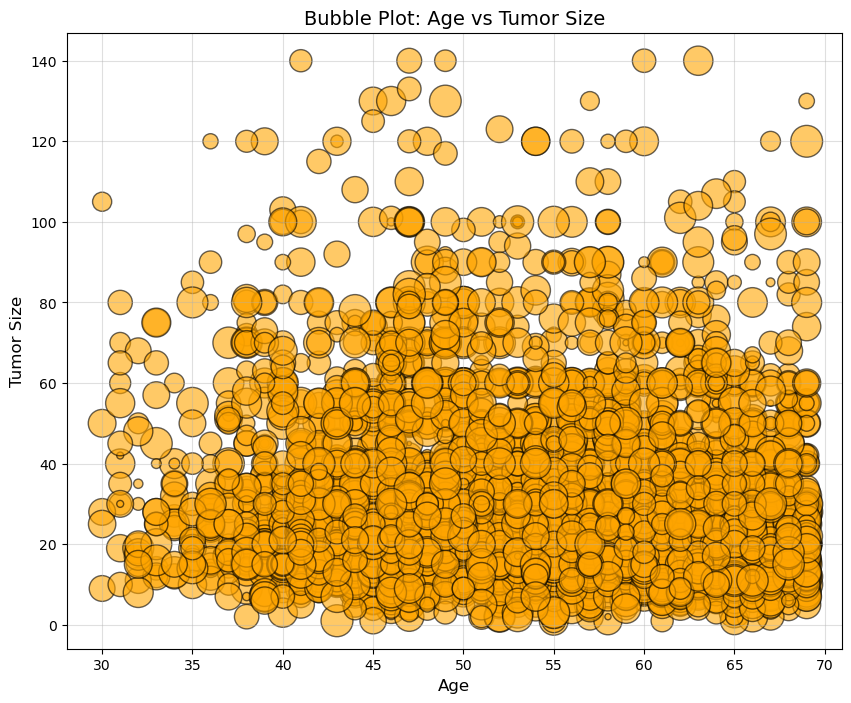

In [81]:
# Bubble plot: Age vs Tumor Size with Survival Months as Bubble
plt.figure(figsize=(10, 8))
bubble_sizes = df['Survival Months'] * 5 
plt.scatter(df['Age'], df['Tumor Size'], s=bubble_sizes, alpha=0.6, c='orange', edgecolors='k')
plt.title('Bubble Plot: Age vs Tumor Size', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Tumor Size', fontsize=12)
plt.grid(alpha=0.4)
plt.show()

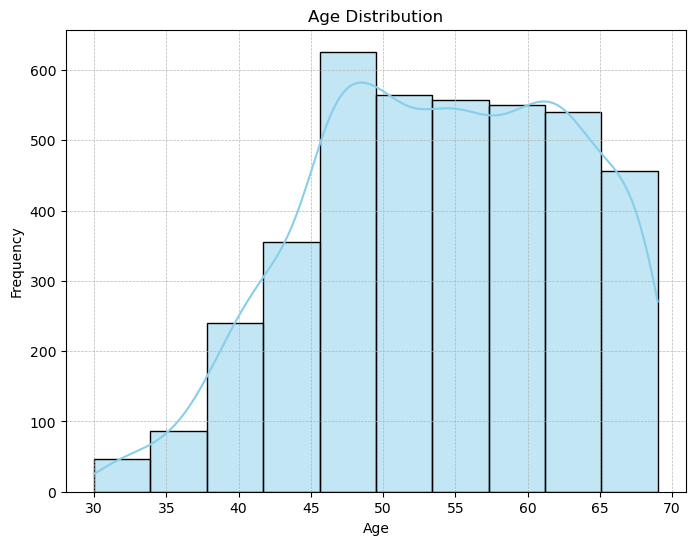

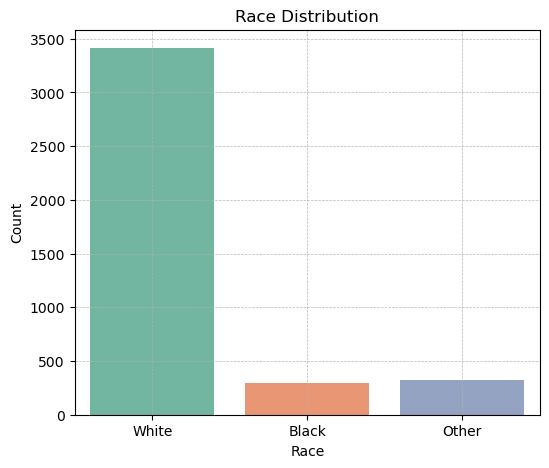

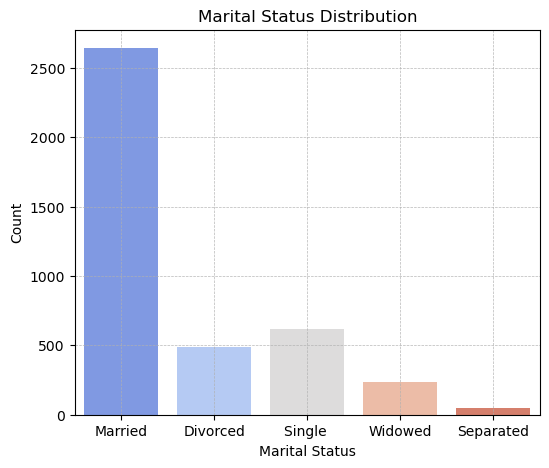

/var/folders/15/58k6nkxs4z1dv6k32vx61d9r0000gn/T/ipykernel_39717/2183298777.py:29: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



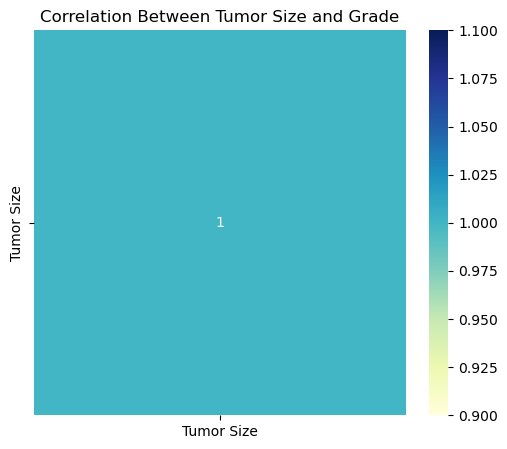

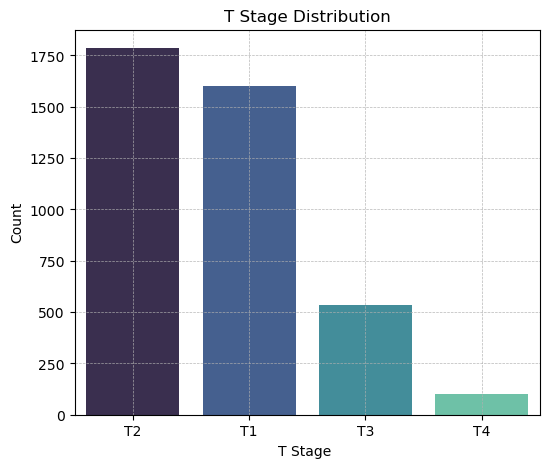

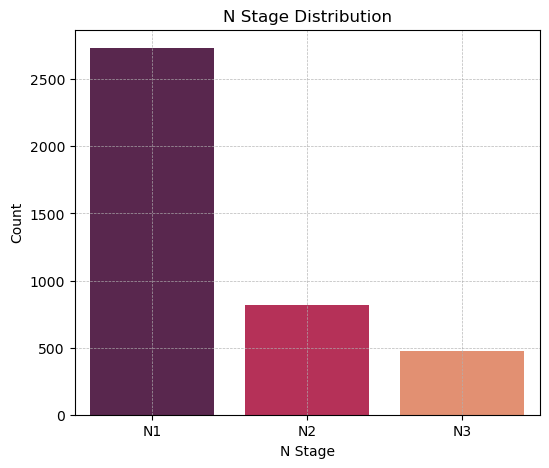

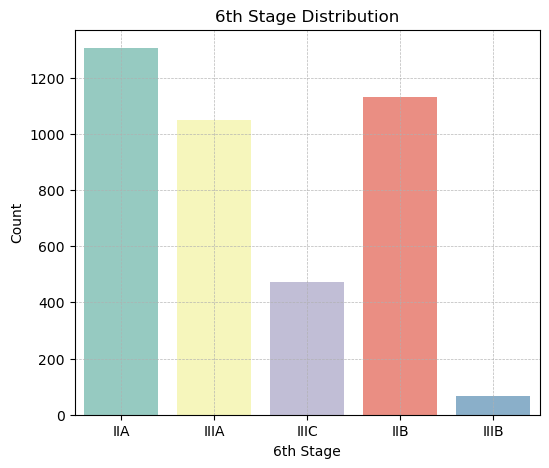

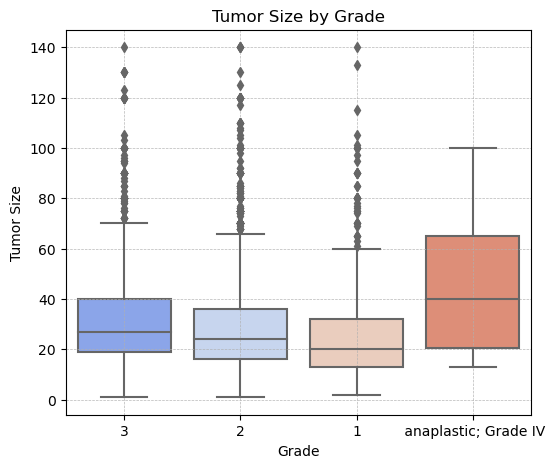

In [114]:
# 1. Demographic Insights
def demographic_visualizations(data):
    plt.figure(figsize=(8, 6))
    sns.histplot(data['Age'], bins=10, kde=True, color='skyblue')
    plt.title("Age Distribution")
    plt.grid(visible=True, linestyle="--", linewidth=0.5, alpha=0.9)
    plt.xlabel("Age")
    plt.ylabel("Frequency")
    plt.show()
    
    plt.figure(figsize=(6, 5))
    sns.countplot(data=data, x='Race', palette='Set2')
    plt.title("Race Distribution")
    plt.grid(visible=True, linestyle="--", linewidth=0.5, alpha=0.9)
    plt.xlabel("Race")
    plt.ylabel("Count")
    plt.show()
    
    plt.figure(figsize=(6, 5))
    sns.countplot(data=data, x='Marital Status', palette='coolwarm')
    plt.title("Marital Status Distribution")
    plt.grid(visible=True, linestyle="--", linewidth=0.5, alpha=0.9)
    plt.xlabel("Marital Status")
    plt.ylabel("Count")
    plt.show()

# 2. Tumor Characteristics
def tumor_correlation_visualizations(data):
    corr_data = data[['Tumor Size', 'Grade']].corr()
    plt.figure(figsize=(6, 5))
    sns.heatmap(corr_data, annot=True, cmap='YlGnBu')
    plt.title("Correlation Between Tumor Size and Grade")
    plt.show()

# 3. Cancer Progression 
def cancer_progression_visualizations(data):
    plt.figure(figsize=(6, 5))
    sns.countplot(data=data, x="T Stage ", order=data["T Stage "].value_counts().index, palette='mako')
    plt.title("T Stage Distribution")
    plt.grid(visible=True, linestyle="--", linewidth=0.5, alpha=0.9)
    plt.xlabel("T Stage ")
    plt.ylabel("Count")
    plt.show()
    
    plt.figure(figsize=(6, 5))
    sns.countplot(data=data, x="N Stage", order=data["N Stage"].value_counts().index, palette='rocket')
    plt.title("N Stage Distribution")
    plt.grid(visible=True, linestyle="--", linewidth=0.5, alpha=0.9)
    plt.xlabel("N Stage")
    plt.ylabel("Count")
    plt.show()
    
    plt.figure(figsize=(6, 5))
    sns.countplot(data=data, x="6th Stage", palette='Set3')
    plt.title("6th Stage Distribution")
    plt.grid(visible=True, linestyle="--", linewidth=0.5, alpha=0.9)
    plt.xlabel("6th Stage")
    plt.ylabel("Count")
    plt.show()

# 4.  Tumor Grade
def risk_profiles(data):
    plt.figure(figsize=(6, 5))
    sns.boxplot(data=data, x='Grade', y='Tumor Size', palette='coolwarm')
    plt.title("Tumor Size by Grade")
    plt.grid(visible=True, linestyle="--", linewidth=0.5, alpha=0.9)
    plt.xlabel("Grade")
    plt.ylabel("Tumor Size")
    plt.show()


demographic_visualizations(df)
tumor_correlation_visualizations(df)
cancer_progression_visualizations(df)
risk_profiles(df)


In [40]:
pip install dash-bootstrap-components

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.5/222.5 kB 537.6 kB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


Text(0.5, 1.0, 'Boxplot of Numerical variables')

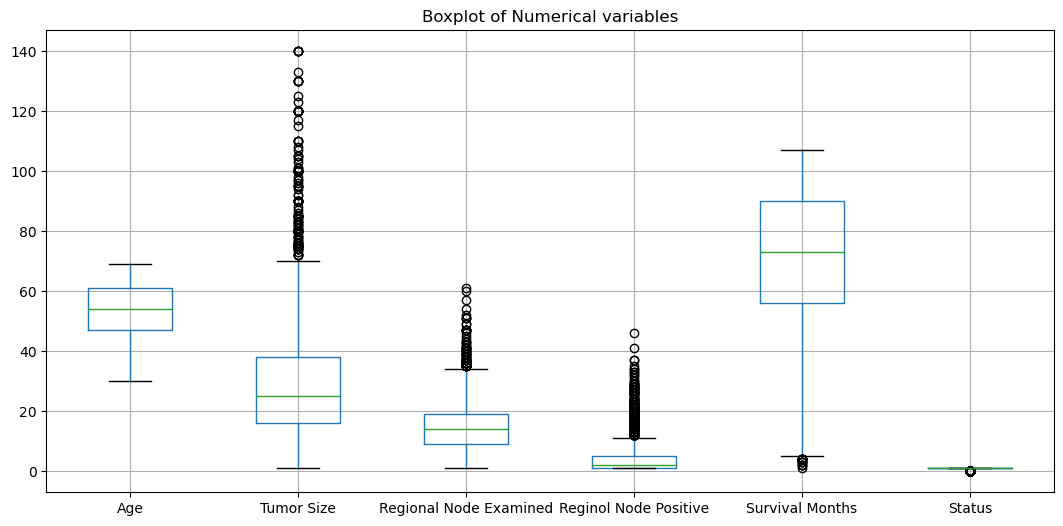

In [49]:
plt.figure(figsize=(13, 6))
df.boxplot()
plt.title("Boxplot of Numerical variables")

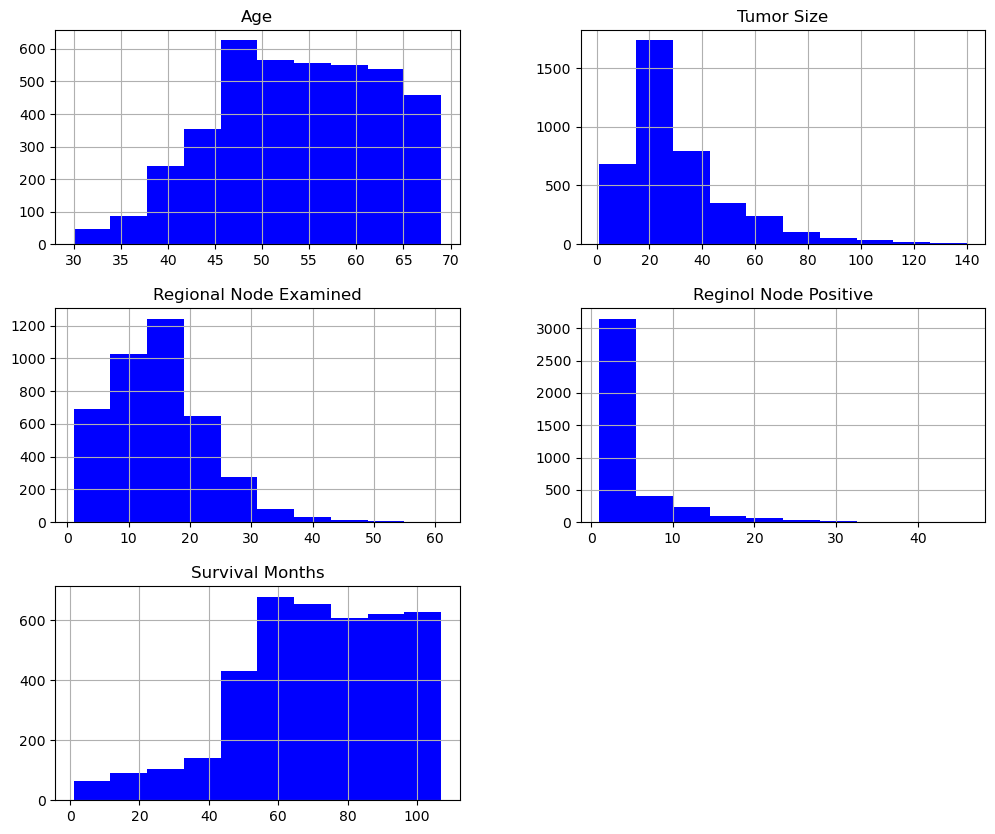

In [54]:
##distibution of numerical variables
df_num2 = df[['Age', 'Tumor Size', 'Regional Node Examined', 'Reginol Node Positive', 'Survival Months']]
df_num2.hist(figsize=(12, 10), color='blue')
plt.show()

### Developed an Interactive Dashboard

In [91]:
import dash
from dash import dcc, html, Input, Output
import dash_bootstrap_components as dbc
import plotly.express as px


# Initialize Dash app
app = dash.Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

# Layout
app.layout = dbc.Container([
    html.H1("Breast Cancer Insights Dashboard", style={'textAlign': 'center'}),
    
    # Dropdown
    dbc.Row([
        dbc.Col([
            dcc.Dropdown(
                id='x-axis',
                options=[{'label': col, 'value': col} for col in ["Race", 'Grade', 'T Stage ', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'A Stage', 'Estrogen Status', 'Progesterone Status','Status']],
                value='Race',
                placeholder="Select X-axis variable"
            )
        ], width=6),
        dbc.Col([
            dcc.Dropdown(
                id='y-axis',
                options=[{'label': col, 'value': col} for col in ['Age', 'Tumor Size', 'Regional Node Examined', 'Reginol Node Positive', 'Survival Months']],
                value='Age',
                placeholder="Select Y-axis variable"
            )
        ], width=6)
    ], className="mb-3"),
    
    # Graph display
    dbc.Row([
        dbc.Col(dcc.Graph(id='scatter-plot'), width=12)
    ]),

    
    dbc.Row([
        dbc.Col(dcc.Graph(id='distribution-plot'), width=6),
        dbc.Col(dcc.Graph(id='correlation-heatmap'), width=6)
    ])
])


@app.callback(
    Output('scatter-plot', 'figure'),
    [Input('x-axis', 'value'), Input('y-axis', 'value')]
)
def update_scatter(x_col, y_col):
    fig = px.scatter(df, x=x_col, y=y_col, color='Race',
                     title=f'{x_col} vs {y_col}', labels={x_col: x_col, y_col: y_col})
    return fig

@app.callback(
    Output('distribution-plot', 'figure'),
    [Input('x-axis', 'value')]
)
def update_distribution(x_col):
    fig = px.histogram(df, x=x_col, color='Race', 
                       title=f'Distribution of {x_col}', labels={x_col: x_col})
    return fig

@app.callback(
    Output('correlation-heatmap', 'figure'),
    [Input('y-axis', 'value')]
)
def update_heatmap(y_col):
    corr_matrix = df.corr()
    fig = px.imshow(corr_matrix, text_auto=True, color_continuous_scale='Viridis', 
                    title="Correlation Matrix")
    return fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True, host='127.0.0.1', port=8050)


/var/folders/15/58k6nkxs4z1dv6k32vx61d9r0000gn/T/ipykernel_39717/2957531124.py:71: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

/var/folders/15/58k6nkxs4z1dv6k32vx61d9r0000gn/T/ipykernel_39717/2957531124.py:71: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

/var/folders/15/58k6nkxs4z1dv6k32vx61d9r0000gn/T/ipykernel_39717/2957531124.py:71: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

